In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as Im
import scipy.optimize as opt
#plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb}'
import cmath

%matplotlib inline

In [77]:
data = pd.read_excel("./data/data.xlsx") #Read the data
data

,Vin (V),Vout (V),Frequency (Hz)
0,9.92,0.168,4.9
1,9.92,0.720,24.0
2,9.92,1.280,46.0
3,9.92,1.920,59.6
4,9.92,2.720,91.2
5,9.92,3.920,137.4
6,9.92,4.760,176.0
7,9.92,6.240,268.2
8,9.92,7.280,352.0
9,9.92,8.160,496.0


In [78]:
V_out = data["Vout (V)"]
V_in = data["Vin (V)"]
Freq = data["Frequency (Hz)"]
Freq_norm = np.log(Freq)

ratio = V_out / V_in

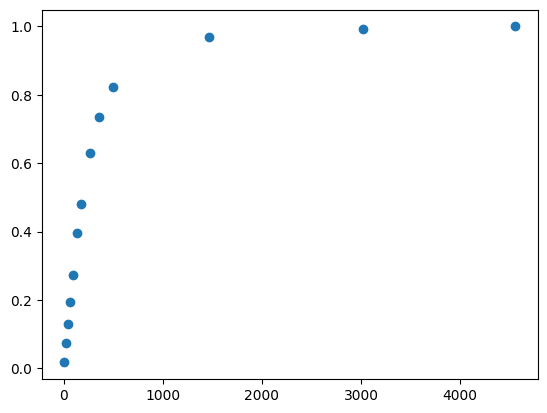

In [79]:
plot = plt.errorbar(Freq, ratio,fmt="o")
plt.show(plot)

In [80]:
R = 5100
C = 0.1*10**-6
Freq = 2*np.pi*Freq
j = 1j
ratio_pred = np.abs(Freq*R*C*j / (1 + Freq*R*C*j))

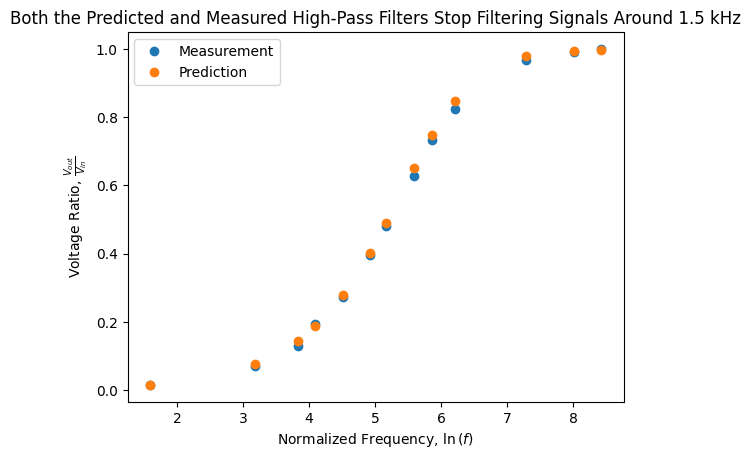

In [89]:
plot1 = plt.errorbar(Freq_norm, ratio,fmt="o",label="Measurement")
plot2 = plt.errorbar(Freq_norm, ratio_pred, fmt='o',label="Prediction")
plt.xlabel(r"Normalized Frequency, $\ln{(f)}$")
plt.ylabel(r"Voltage Ratio, $\frac{V_{out}}{V_{in}}$") 
plt.legend()
plt.title("Both the Predicted and Measured High-Pass Filters Stop Filtering Signals Around 1.5 kHz")
plt.show(plot1, plot2)